In [3]:
import numpy as np
import pickle
import dm_den
import dm_den_viz

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.lines import Line2D

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.grid'] = False
rcParams['axes.titlesize']=20
rcParams['axes.labelsize']=17
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=14
rcParams['figure.facecolor']='white'

In [5]:
df = dm_den.load_data('dm_stats_20220629.h5')
df_drop = df.drop(['m12w', 'm12z'])
disp_label = '$\\sigma_\mathrm{DM}\,/\,'\
             '\\left[\mathrm{km\,s^{-1}}\\right]$'

In [6]:
#den_disp_dict = dm_den.den_disp_phi_bins('dm_stats_20220715.h5',
#                                         'den_disp_dict_20220818.pkl')
fname = '/export/nfs0home/pstaudt/projects/' \
        'project01/data/den_disp_dict_20220818.pkl'
with open(fname, 'rb') as f:
    den_disp_dict = pickle.load(f)

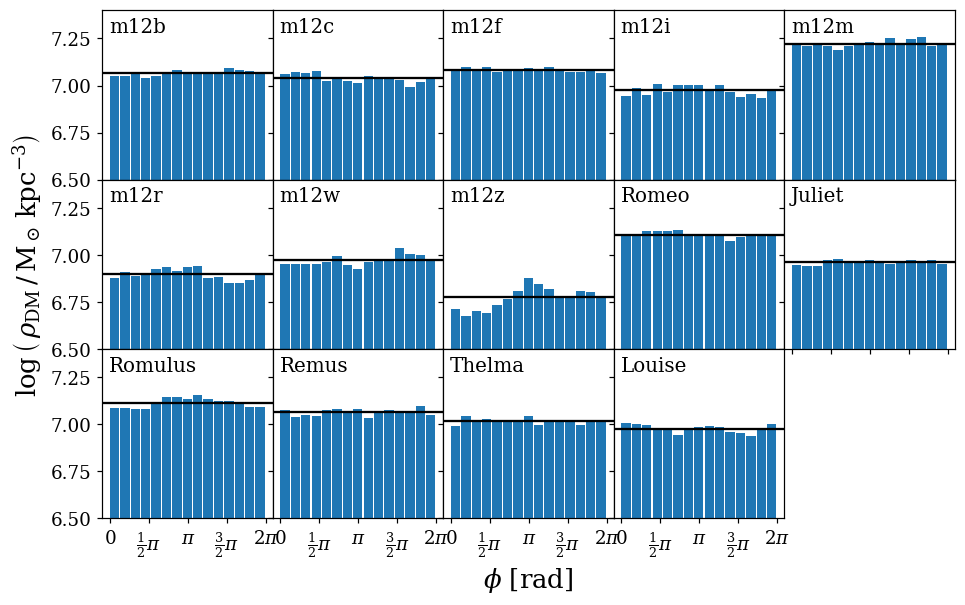

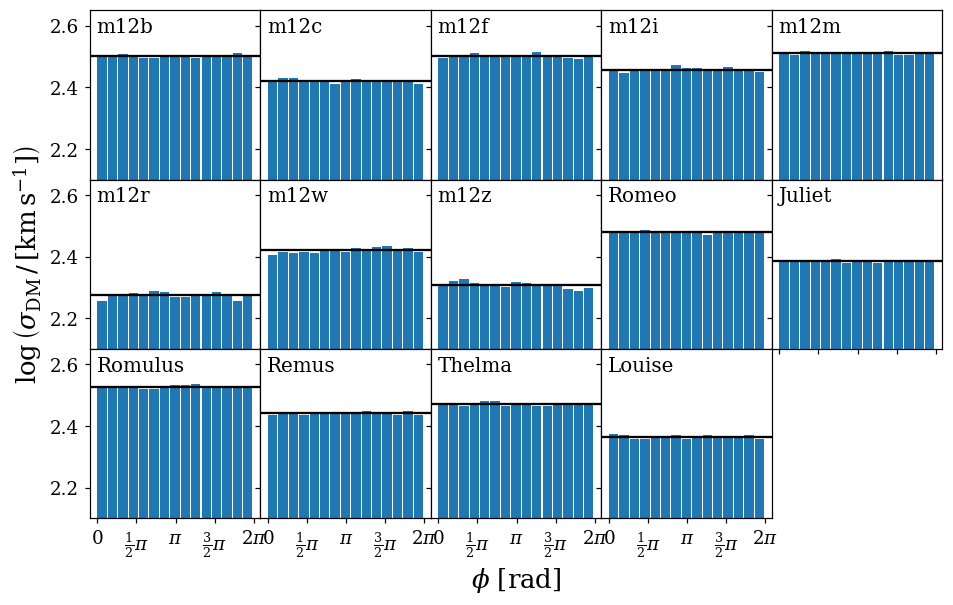

In [5]:
def vs_phi(tgt):
    fig,axs = plt.subplots(3, 5, figsize=(10,6), sharey=True, sharex=True,
                           dpi=110)
    fig.subplots_adjust(wspace=0.0, hspace=0.0)
    axs = axs.ravel()  

    axs[-3].set_xlabel('$\phi$ [rad]')
    if tgt=='den':
        axs[5].set_ylabel('$\log\\left(\,\\rho_\mathrm{DM}\,'
                          '/\,\mathrm{M_\odot\,kpc^{-3}}\\right)$')
    elif tgt=='disp':
        axs[5].set_ylabel('$\log\\left('+disp_label.replace('$','')+'\\right)$')

    for k, galname in enumerate(df.index):
        phi_bins = den_disp_dict[galname]['phi_bins']
            
        if tgt=='den':
            x = den_disp_dict[galname]['dens']
            col = 'den_disc'
            axs[0].set_ylim(6.5,7.4)
        elif tgt=='disp':
            x = den_disp_dict[galname]['disps']
            col = 'disp_dm_disc_cyl'
            axs[0].set_ylim(2.1,2.65)
        axs[k].bar(phi_bins[:-1], np.log10(x), align='edge', 
        #axs[k].bar(phi_bins[:-1], x, align='edge', 
                width=(phi_bins[1]-phi_bins[0])*0.9)            
        axs[k].axhline(np.log10(df.loc[galname,col]), color='k')
        #axs[k].axhline(df.loc[galname,col], color='k')
        axs[k].tick_params(axis='both', which='major', labelsize=12)

        axs[k].annotate(galname,
                        (0.04, 0.96),
                        xycoords='axes fraction', fontsize=13,
                        horizontalalignment='left',
                        verticalalignment='top')

    xticks = np.linspace(0., 2.*np.pi, 5)
    labels = ['$0$', '$\\frac{1}{2}\pi$', '$\pi$', '$\\frac{3}{2}\pi$',
              '$2\pi$']
    axs[0].set_xticks(xticks, labels=labels)
    axs[-1].remove()
    plt.show()
    
    return None

vs_phi('den')
vs_phi('disp')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

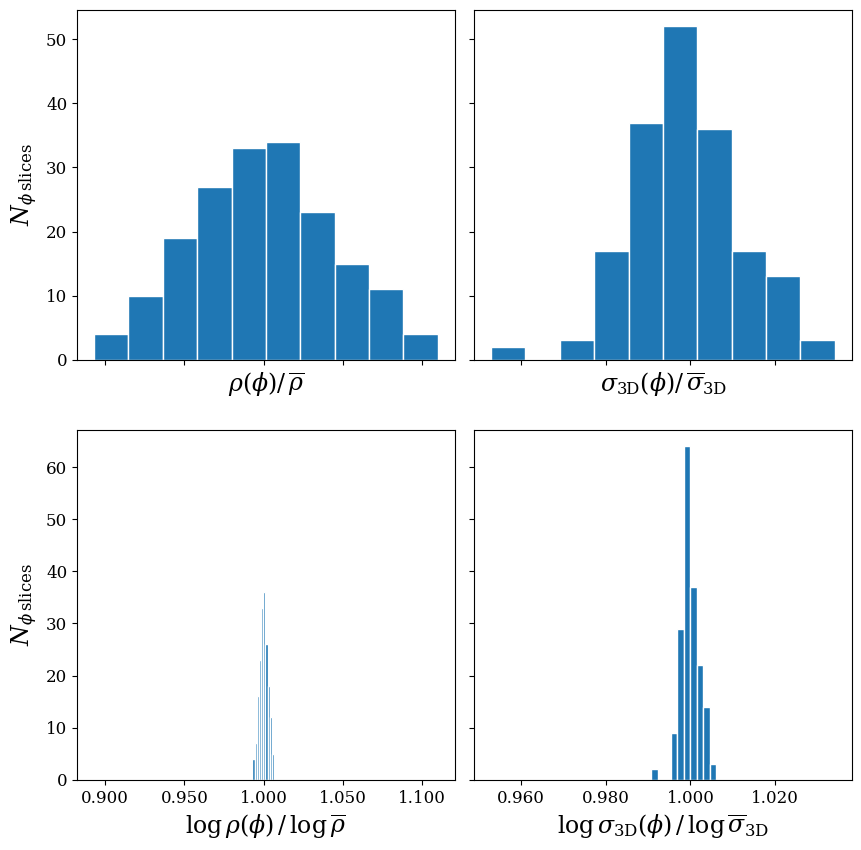

In [17]:
dm_den_viz.plt_disc_diffs(df_source='dm_stats_20221208.h5',
                          diff_source='den_disp_dict_N15_dz0.5_20230707.pkl')

# Testing different numbers of $\phi$ slices

## Using a 0.5 kpc thick disc

15 slices
3.48 kpc arclength slices
0.71% max den diff
0.92% max disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

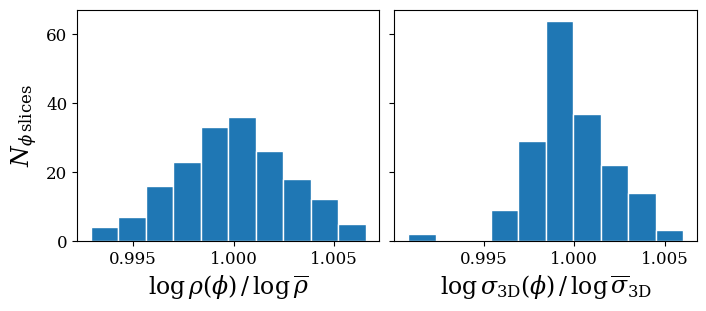

30 slices
1.74 kpc arclength slices
0.86% max den diff
1.15% max disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

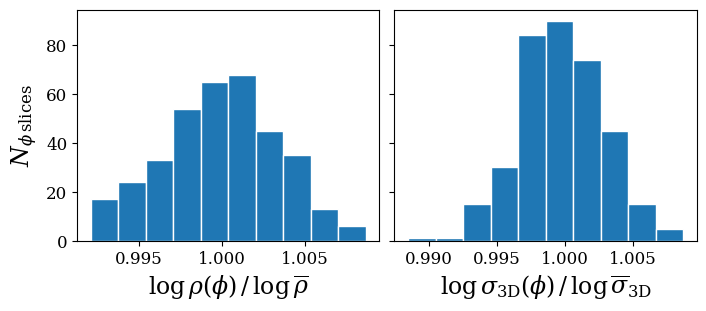

100 slices\0.52 kpc arclength slices
2.02% max den diff
2.17% max disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

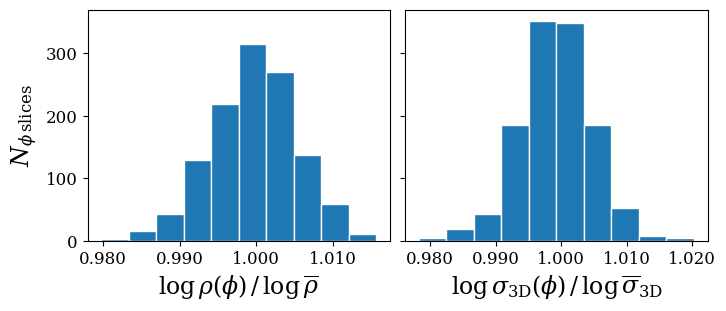

In [26]:
reload(dm_den_viz)
print('15 slices\n{0:0.2f} kpc arclength slices'.format(2.*np.pi/15.*8.3))
dm_den_viz.plt_disc_diffs(df_source='dm_stats_20221208.h5',
                          diff_source='den_disp_dict_N15_dz0.5_20230707.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)
print('30 slices\n{0:0.2f} kpc arclength slices'.format(2.*np.pi*8.3/30.))
dm_den_viz.plt_disc_diffs(df_source='dm_stats_20221208.h5',
                          diff_source='den_disp_dict_N30_20220927.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)
print('100 slices\{0:0.2f} kpc arclength slices'.format(2.*np.pi/100.*8.3))
dm_den_viz.plt_disc_diffs(df_source='dm_stats_20221208.h5',
                          diff_source='den_disp_dict_N100_20220927.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)

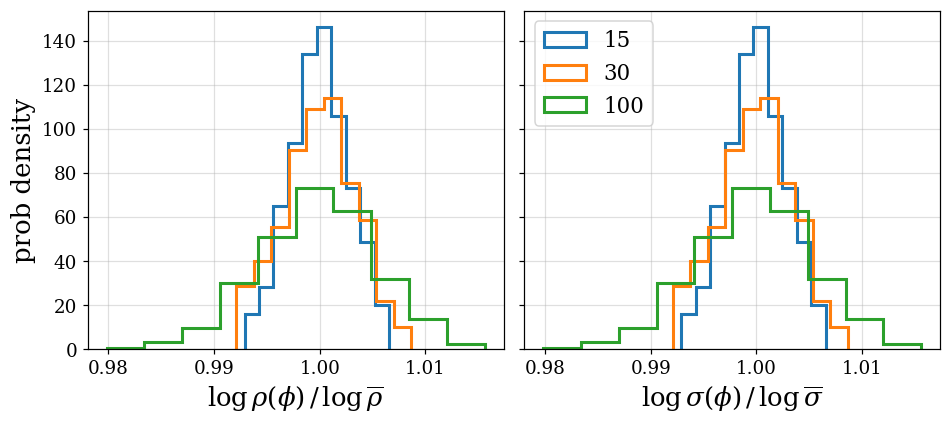

In [8]:
galnames = df_drop.index
Nbins=10
lw=2.

fig, axs = plt.subplots(1, 2, figsize=(10,4), sharey=True, dpi=110.)
fig.subplots_adjust(wspace=0.05)
for N, fname in zip([15,30,100],
                    ['den_disp_dict_20220818.pkl',
                     'den_disp_dict_N30_20220927.pkl',
                     'den_disp_dict_N100_20220927.pkl']):
    with open('./data/'+fname, 'rb') as f:
        den_disp_dict = pickle.load(f)
    dens = np.array([den_disp_dict[galname]['log(dens)/log(avg)'] \
                     for galname in galnames]).flatten()
    disps = np.array([den_disp_dict[galname]['log(dens)/log(avg)'] \
                      for galname in galnames]).flatten()
    
    axs[0].hist(dens, Nbins, density=True, histtype='step', lw=lw)
    axs[1].hist(disps, Nbins, density=True, histtype='step', lw=lw, label=N)
axs[1].legend()
axs[0].set_ylabel('prob density')
axs[0].set_xlabel('$\log\\rho(\phi)\,/\,\log\overline{\\rho}$')
axs[1].set_xlabel('$\log\sigma(\phi)\,/\,\log\overline{\sigma}$')
for ax in axs:
    ax.grid(alpha=0.4)
plt.show()

100% |########################################################################################################################|


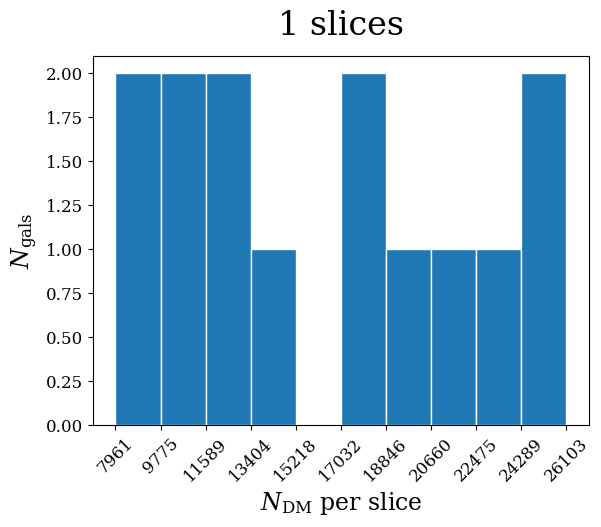

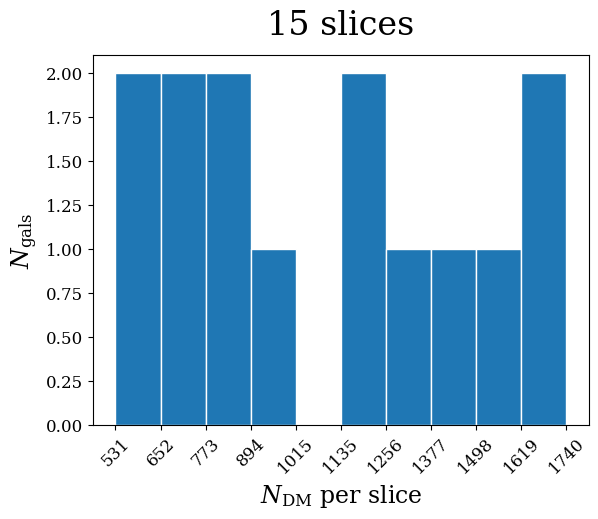

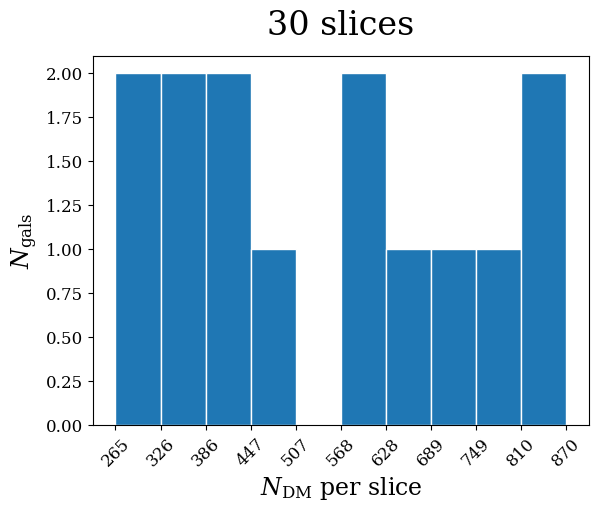

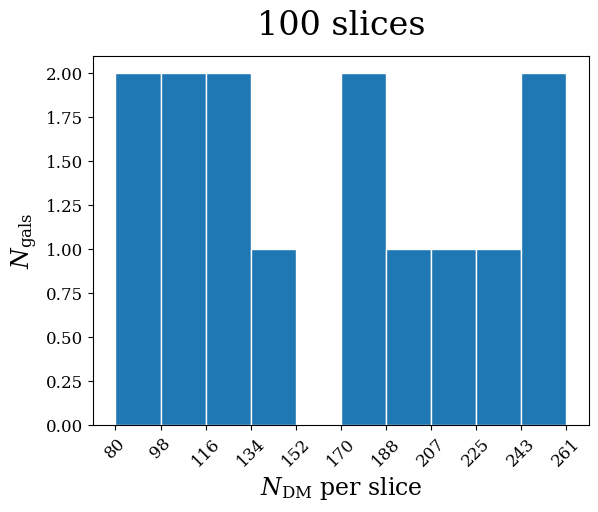

In [19]:
reload(dm_den_viz)
dm_den_viz.plt_particle_counts('dm_stats_20221208.h5')

## Using a 1.0 kpc thick disc

15 slices
3.48 kpc arclength slices
0.62% max den diff
0.83% max disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

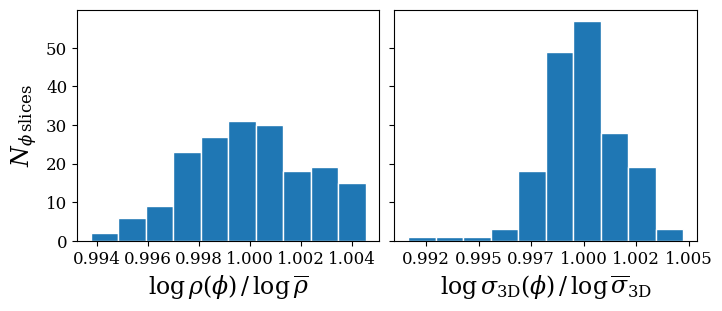

30 slices
1.74 kpc arclength slices
0.86% max den diff
1.15% max disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

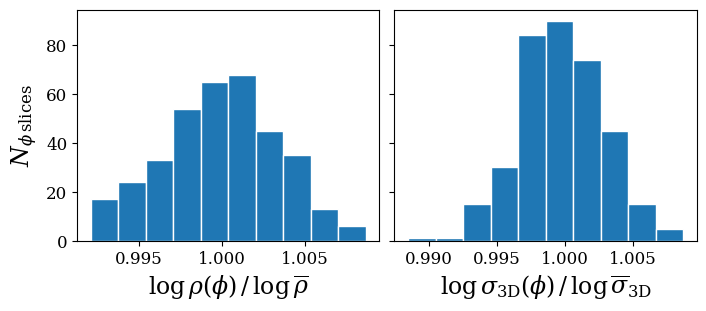

In [27]:
reload(dm_den_viz)
print('15 slices\n{0:0.2f} kpc arclength slices'.format(2.*np.pi*8.3/15.))
dm_den_viz.plt_disc_diffs('dm_stats_dz1.0_20230626.h5',
                          'den_disp_dict_N15_dz1.0_20230707.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)
print('30 slices\n{0:0.2f} kpc arclength slices'.format(2.*np.pi*8.3/30.))
dm_den_viz.plt_disc_diffs('dm_stats_dz1.0_20230626.h5',
                          'den_disp_dict_N30_dz1.0_20230707.pkl',
                          only_log=True, figsize=(8,3),
                          tgt_fname=None,
                          update_val=False)

100% |#########################################################################################################|


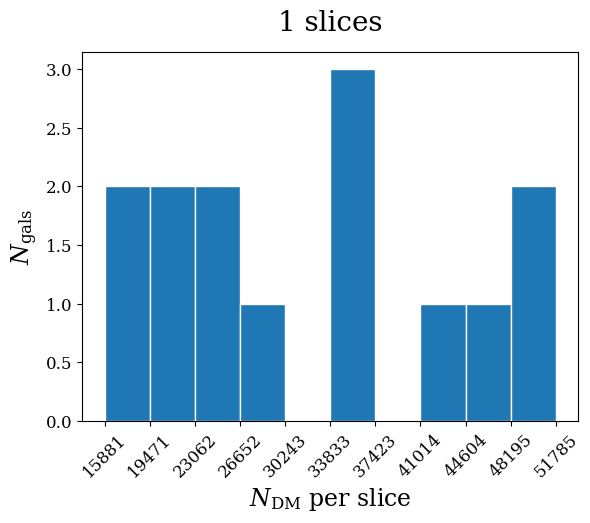

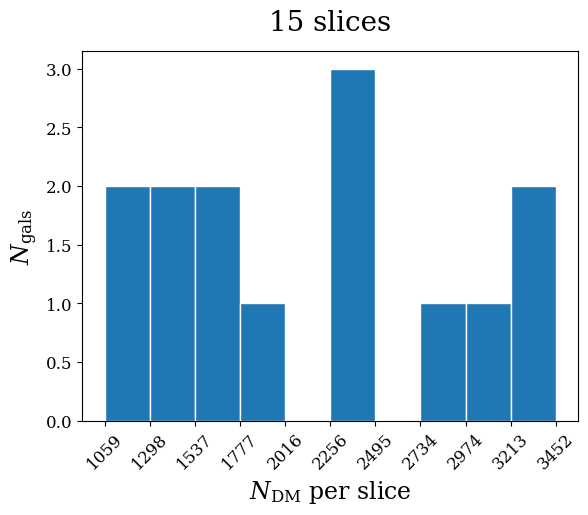

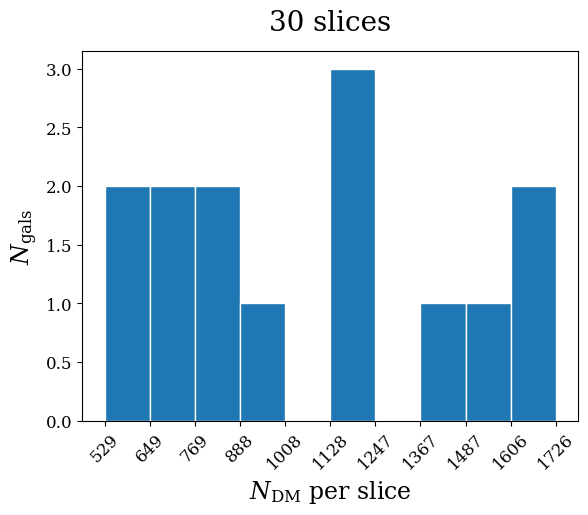

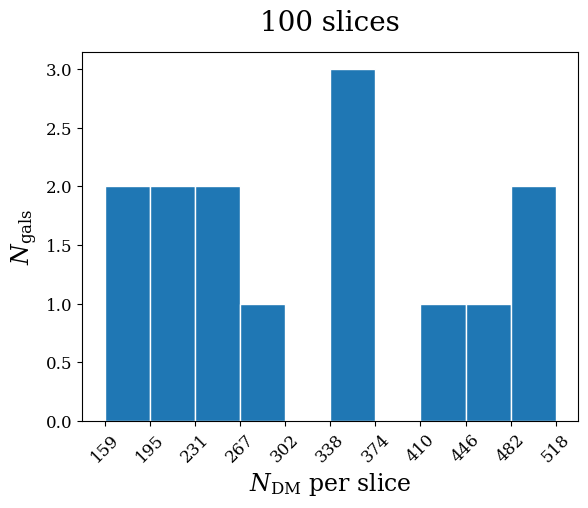

In [10]:
dm_den_viz.plt_particle_counts('dm_stats_dz1.0_20230626.h5')